In [41]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [42]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

In [43]:
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]
n_classes

1

In [44]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

In [46]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))

In [47]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [54]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

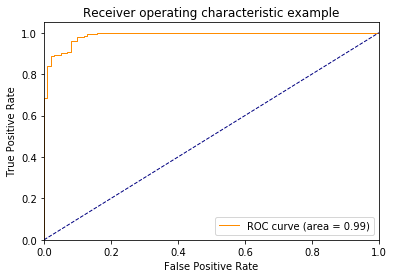

In [58]:
plt.figure()
lw = 1
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()